In [1]:
import os
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('Resources/')

In [2]:
df = pd.read_csv('1_CC_Structured_Data.csv')
df.head()

,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,FastingBloodSugar,RestingECG,MaximumHeartRate,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,Male,Atypical Angina,140.0,289.0,No,Normal,172.0,No,0.0,Upsloping,No
1,49,Female,Non-anginal Pain,160.0,180.0,No,Normal,156.0,No,1.0,Flat,Yes
2,37,Male,Atypical Angina,130.0,283.0,No,Abnormal ST-T Wave,98.0,No,0.0,Upsloping,No
3,48,Female,Asymptomatic,138.0,214.0,No,Normal,108.0,Yes,1.5,Flat,Yes
4,54,Male,Non-anginal Pain,150.0,195.0,No,Normal,122.0,No,0.0,Upsloping,No


In [3]:
# Rename columns for clarity (if necessary)
df.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestingECG', 'MaximumHeartRate', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

# Convert 'HeartDisease' to numerical values
df['HeartDisease'] = df['HeartDisease'].map({'No': 0, 'Yes': 1})

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame with the necessary data
sns.set(style="whitegrid")

# List of attributes to plot
attributes = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestingECG', 'MaximumHeartRate', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Iterate through the attributes and create histograms
for i, attribute in enumerate(attributes):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=attribute, hue='HeartDisease', multiple='stack', palette={0: "blue", 1: "orange"}, kde=True)
    plt.xlabel(attribute, fontsize=24, fontweight='bold', family='serif')
    plt.ylabel('Frequency', fontsize=24, fontweight='bold', family='serif')
    plt.tick_params(axis='x', rotation=-25, labelsize=24)
    plt.tick_params(axis='y', labelsize=24)
    
    # Save each figure as a separate image
    plt.tight_layout()
    plt.savefig(f'Images/2_CC_{i+1}_{attribute}.png', transparent=True)
    plt.close()  # Close the figure after saving to avoid memory issues

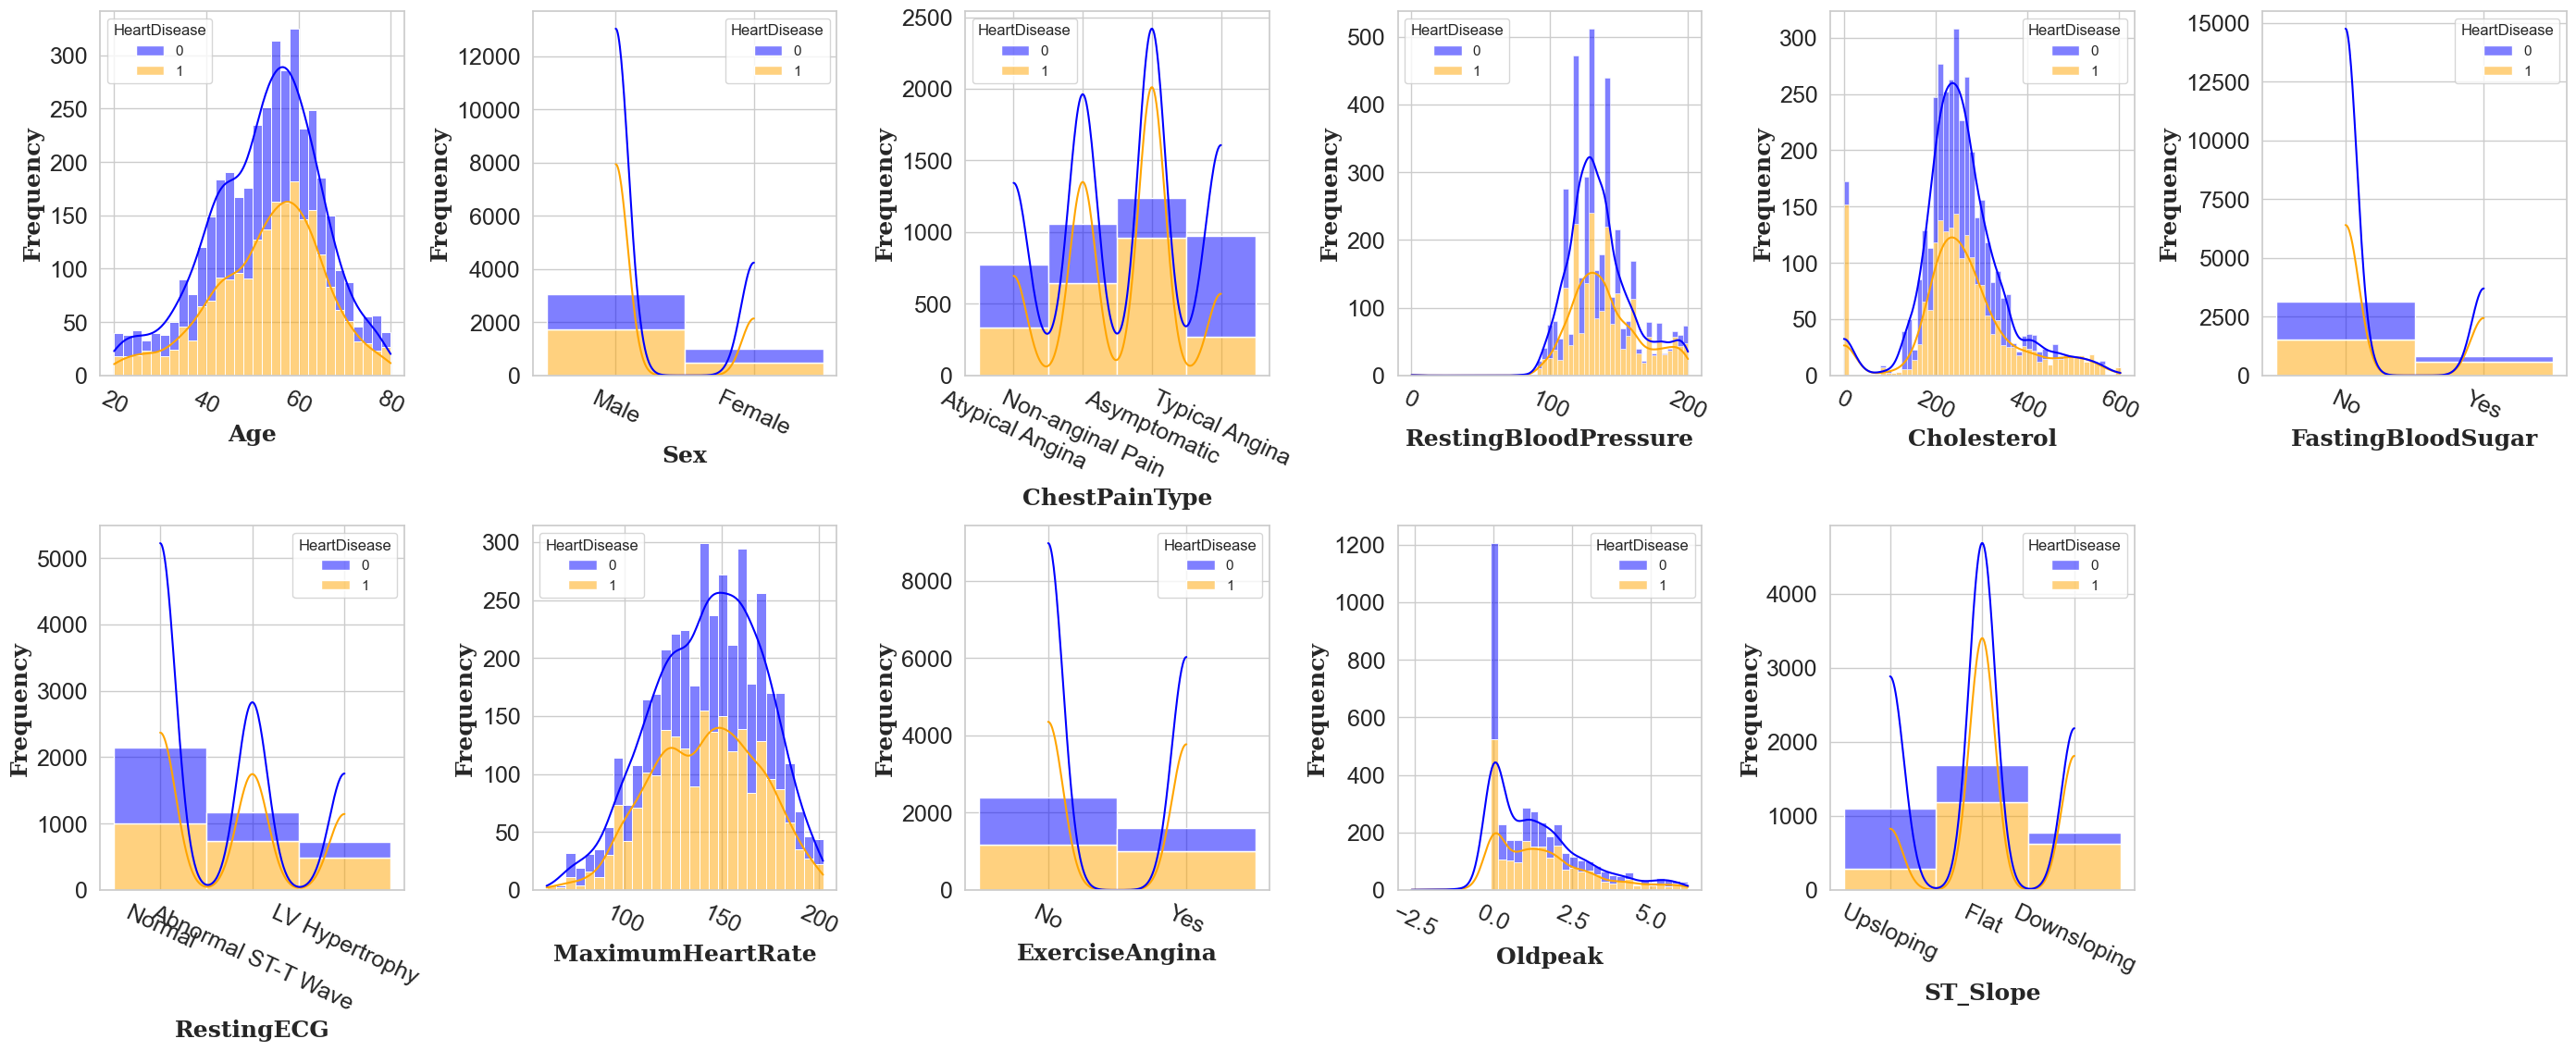

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is your DataFrame with the necessary data
# Set up the plotting area
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(28, 12))

# List of attributes to plot
attributes = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 
              'FastingBloodSugar', 'RestingECG', 'MaximumHeartRate', 'ExerciseAngina', 
              'Oldpeak', 'ST_Slope']

# Iterate through the attributes and create histograms
for i, attribute in enumerate(attributes):
    row = i // 6
    col = i % 6
    ax = axes[row, col]
    sns.histplot(data=df, x=attribute, hue='HeartDisease', multiple='stack', ax=ax, 
                 palette={0: "blue", 1: "orange"}, kde=True)
    ax.set_xlabel(attribute, fontsize=18, fontweight='bold', family='serif')
    ax.set_ylabel('Frequency', fontsize=18, fontweight='bold', family='serif')
    ax.tick_params(axis='x', rotation=-25, labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

# Remove the last empty subplot (if there's any)
if len(attributes) < 12:
    fig.delaxes(axes[1, 5])

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('Images/2_CC_classification_graphs_.png', transparent=True)
plt.show()
